# 5 Histograms
Histograms play a fundamental role in any type of physics analysis, not only to visualise measurements but being a powerful form of data reduction. ROOT offers many classes that represent histograms, all inheriting from the [```TH1```](https://root.cern.ch/doc/master/classTH1.html) class. We will focus in this chapter on uni- and bi- dimensional histograms the bin contents of which are represented by floating point numbers the [```TH1F```](https://root.cern.ch/doc/master/classTH1F.html) and [```TH2F```](https://root.cern.ch/doc/master/classTH2F.html) classes respectively. To optimise the memory usage you might go for one byte ([```TH1C```](https://root.cern.ch/doc/master/classTH1C.html)), short ([```TH1S```](https://root.cern.ch/doc/master/classTH1S.html)), integer ([```TH1I```](https://root.cern.ch/doc/master/classTH1I.html)) or double-precision ([```TH1D```](https://root.cern.ch/doc/master/classTH1D.html)) bin-content.

## 5.1 Your First Histogram
Let’s suppose you want to measure the counts of a Geiger detector located in proximity of a radioactive source in a given time interval. This would give you an idea of the activity of your source. The count distribution in this case is a Poisson distribution. Let’s see how operatively you can fill and draw a histogram with the following example macro.

The result of a counting (pseudo) experiment. Only bins corresponding to integer values are filled given the discrete nature of the poissonian distribution.

Using histograms is rather simple. The main differences with respect to graphs that emerge from the example are:

* In the begining the histograms have a name and a title right from the start, no predefined number of entries but a number of bins and a lower-upper range.

In [1]:
%jsroot on

In [2]:
   auto cnt_r_h=new TH1F("count_rate",
                "Count Rate;N_{Counts};# occurencies",
                100, // Number of Bins
                -0.5, // Lower X Boundary
                15.5); // Upper X Boundary

    auto mean_count=3.6f;
    TRandom3 rndgen_5_1;
    // simulate the measurements

* During each loop of the following for an entry is stored in the histogram through the TH1F::Fill method.

In [3]:
for (int imeas=0;imeas<400;imeas++)
    cnt_r_h->Fill(rndgen_5_1.Poisson(mean_count));

auto canvas_5_1= new TCanvas();
cnt_r_h->Draw();

auto canvas_5_2= new TCanvas();

* The histogram can be drawn also normalised, ROOT automatically takes cares of the necessary rescaling.

In [4]:
    cnt_r_h->DrawNormalized();

* This small snippet shows how easy it is to access the moments and associated errors of a histogram.

In [5]:
// Print summary
cout << "Moments of Distribution:\n"
     << " - Mean     = " << cnt_r_h->GetMean() << " +- "
                        << cnt_r_h->GetMeanError() << "\n"
     << " - Std Dev  = " << cnt_r_h->GetStdDev() << " +- "
                        << cnt_r_h->GetStdDevError() << "\n"
     << " - Skewness = " << cnt_r_h->GetSkewness() << "\n"
     << " - Kurtosis = " << cnt_r_h->GetKurtosis() << "\n";
canvas_5_1->Draw();

Moments of Distribution:
 - Mean     = 3.5625 +- 0.0895976
 - Std Dev  = 1.79195 +- 0.0633551
 - Skewness = 0.326374
 - Kurtosis = -0.242483


In [6]:
    canvas_5_2->Draw();

## 5.2 Add and Divide Histograms

Quite a large number of operations can be carried out with histograms. The most useful are addition and division. In the following macro we will learn how to manage these procedures within ROOT.

Some lines now need a bit of clarification:

* Cling, as we know, is also able to interpret more than one function per file. In this case the format_h function simply sets up some parameters to conveniently set the line of histograms.

In [7]:
%%cpp -d
// Divide and add 1D Histograms

void format_h(TH1F* h, int linecolor){
    h->SetLineWidth(3);
    h->SetLineColor(linecolor);
    }

In [8]:
    auto sig_h=new TH1F("sig_h","Signal Histo",50,0,10);
    auto gaus_h1=new TH1F("gaus_h1","Gauss Histo 1",30,0,10);
    auto gaus_h2=new TH1F("gaus_h2","Gauss Histo 2",30,0,10);
    auto bkg_h=new TH1F("exp_h","Exponential Histo",50,0,10);

    // simulate the measurements
    TRandom3 rndgen_5_2;

* Here some C++ syntax for conditional statements is used to fill the histograms with different numbers of entries inside the loop.

In [9]:
    for (int imeas=0; imeas<4000; imeas++){
        bkg_h->Fill(rndgen_5_2.Exp(4));
        if (imeas%4==0) gaus_h1->Fill(rndgen_5_2.Gaus(5,2));
        if (imeas%4==0) gaus_h2->Fill(rndgen_5_2.Gaus(5,2));
        if (imeas%10==0)sig_h->Fill(rndgen_5_2.Gaus(5,.5));}
    
    // Format Histograms
    int i=0;
    for (auto hist : {sig_h,bkg_h,gaus_h1,gaus_h2})
        format_h(hist,1+i++);

    // Sum
    auto sum_h= new TH1F(*bkg_h);

* Here the sum of two histograms. A weight, which can be negative, can be assigned to the added histogram.

In [10]:
    sum_h->Add(sig_h,1.);
    sum_h->SetTitle("Exponential + Gaussian;X variable;Y variable");
    format_h(sum_h,kBlue);

    auto canvas_5_2_sum= new TCanvas();
    sum_h->Draw("hist");
    bkg_h->Draw("SameHist");
    sig_h->Draw("SameHist");

    

* The division of two histograms is rather straightforward.

In [11]:
    // Divide
    auto dividend=new TH1F(*gaus_h1);
    dividend->Divide(gaus_h2);

* When you draw two quantities and their ratios, it is much better if all the information is condensed in one single plot. These lines provide a skeleton to perform this operation.

In [12]:
    // Graphical Maquillage
    dividend->SetTitle(";X axis;Gaus Histogram 1 / Gaus Histogram 2");
    format_h(dividend,kOrange);
    gaus_h1->SetTitle(";;Gaus Histo 1 and Gaus Histo 2");
    gStyle->SetOptStat(0);

    TCanvas* canvas_5_2_divide= new TCanvas();
    canvas_5_2_divide->Divide(1,2,0,0);
    canvas_5_2_divide->cd(1);
    canvas_5_2_divide->GetPad(1)->SetRightMargin(.01);
    gaus_h1->DrawNormalized("Hist");
    gaus_h2->DrawNormalized("HistSame");

    canvas_5_2_divide->cd(2);
    dividend->GetYaxis()->SetRangeUser(0,2.49);
    canvas_5_2_divide->GetPad(2)->SetGridy();
    canvas_5_2_divide->GetPad(2)->SetRightMargin(.01);
    dividend->Draw();
    
    canvas_5_2_sum->Draw();
    canvas_5_2_divide->Draw();

## 5.3 Two-dimensional Histograms

Two-dimensional histograms are a very useful tool, for example to inspect correlations between variables. You can exploit the bi-dimensional histogram classes provided by ROOT in a simple way. Let’s see how in this code:

In [13]:
%jsroot off

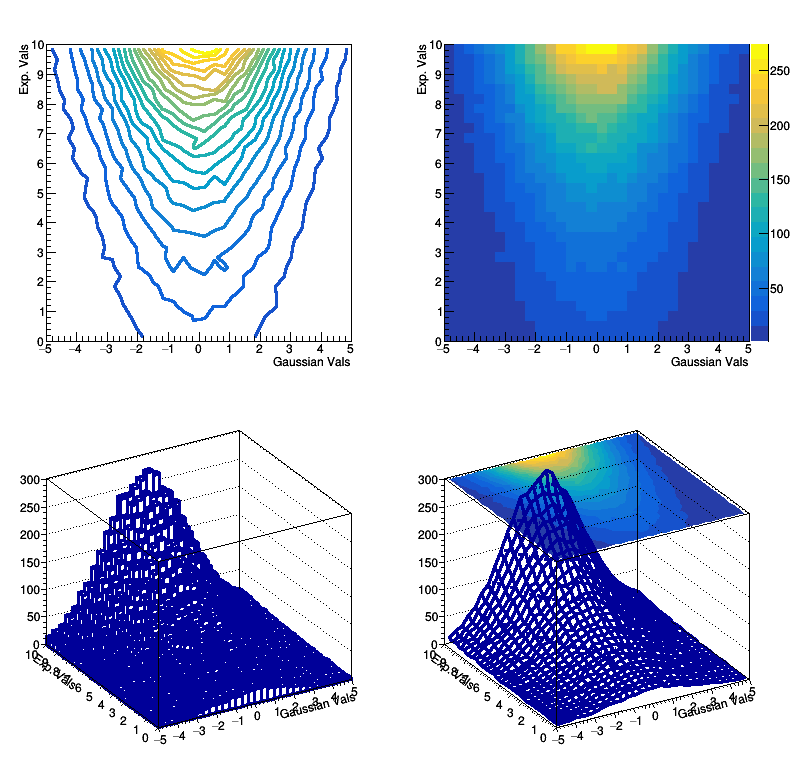

In [14]:
// Draw a Bidimensional Histogram in many ways
// together with its profiles and projections

gStyle->SetPalette(kBird);
gStyle->SetOptStat(0);
gStyle->SetOptTitle(0);

TH2F bidi_h("bidi_h","2D Histo;Gaussian Vals;Exp. Vals",
            30,-5,5,  // X axis
            30,0,10); // Y axis

TRandom3 rgen_5_3;
for (int i=0;i<500000;i++)
    bidi_h.Fill(rgen_5_3.Gaus(0,2),10-rgen_5_3.Exp(4),.1);

auto canvas_5_3_1=new TCanvas("canvas_5_3_1","canvas_5_3_1",800,800);
canvas_5_3_1->Divide(2,2);
canvas_5_3_1->cd(1);bidi_h.Draw("Cont1");
canvas_5_3_1->cd(2);bidi_h.Draw("Colz");
canvas_5_3_1->cd(3);bidi_h.Draw("lego");
canvas_5_3_1->cd(4);bidi_h.Draw("surf3");
    // Profiles and Projections
canvas_5_3_1->Draw();

In [15]:
%jsroot on

In [16]:
auto canvas_5_3_2=new TCanvas("canvas_5_3_2","canvas_5_3_2",800,800);
canvas_5_3_2->Divide(2,2);
canvas_5_3_2->cd(1);bidi_h.ProjectionX()->DrawClone();
canvas_5_3_2->cd(2);bidi_h.ProjectionY()->DrawClone();
canvas_5_3_2->cd(3);bidi_h.ProfileX()->DrawClone();
canvas_5_3_2->cd(4);bidi_h.ProfileY()->DrawClone();

canvas_5_3_2->Draw();

Two kinds of plots are provided within the code, the first one containing three-dimensional representations  and the second one projections and profiles of the bi-dimensional histogram.

The projections and profiles of bi-dimensional histograms.

When a projection is performed along the x (y) direction, for every bin along the x (y) axis, all bin contents along the y (x) axis are summed up. When a profile is performed along the x (y) direction, for every bin along the x (y) axis, the average of all the bin contents along the y (x) is calculated together with their RMS and displayed as a symbol with error bar.

Correlations between the variables are quantified by the methods ```Double_t GetCovariance()``` and ```Double_t GetCorrelationFactor()```.

## 5.4 Multiple histograms
The class ```THStack``` allows to manipulate a set of histograms as a single entity. It is a collection of ```TH1``` (or derived) objects. When drawn, the X and Y axis ranges are automatically computed such as all the histograms will be visible. Several drawing option are available for both 1D and 2D histograms. The next macros shows how it looks for 2D histograms:

In [17]:
%jsroot off

In [18]:
// Example of stacked histograms using the class THStack
auto canvas_5_4=new TCanvas("canvas_5_4","canvas_5_4", 900, 700);

* Here we create the stack.

In [19]:
THStack *stHistogram_5_4 = new THStack("stHistogram_5_4","Stacked 2D histograms");

* Here we create two histograms to be added in the stack.

In [20]:
TF2 *f1 = new TF2("f1","xygaus + xygaus(5) + xylandau(10)",-4,4,-4,4);
Double_t params1[] = {130,-1.4,1.8,1.5,1, 150,2,0.5,-2,0.5, 3600,-2,0.7,-3,0.3};
f1->SetParameters(params1);
TH2F *histogram_5_4_1 = new TH2F("histogram_5_4_1","histogram_5_4_1",20,-4,4,20,-4,4);
histogram_5_4_1->SetFillColor(38);
histogram_5_4_1->FillRandom("f1",4000);
TF2 *f2 = new TF2("f2","xygaus + xygaus(5)",-4,4,-4,4);
Double_t params2[] = {100,-1.4,1.9,1.1,2, 80,2,0.7,-2,0.5};
f2->SetParameters(params2);
TH2F *histogram_5_4_2 = new TH2F("histogram_5_4_2","histogram_5_4_2",20,-4,4,20,-4,4);
histogram_5_4_2->SetFillColor(46);
histogram_5_4_2->FillRandom("f2",3000);

* Here we add the histograms in the stack.

In [21]:
stHistogram_5_4->Add(histogram_5_4_1);
stHistogram_5_4->Add(histogram_5_4_2);

* Finally we draw the stack as a lego plot. In which the colour distinguish the two histograms.

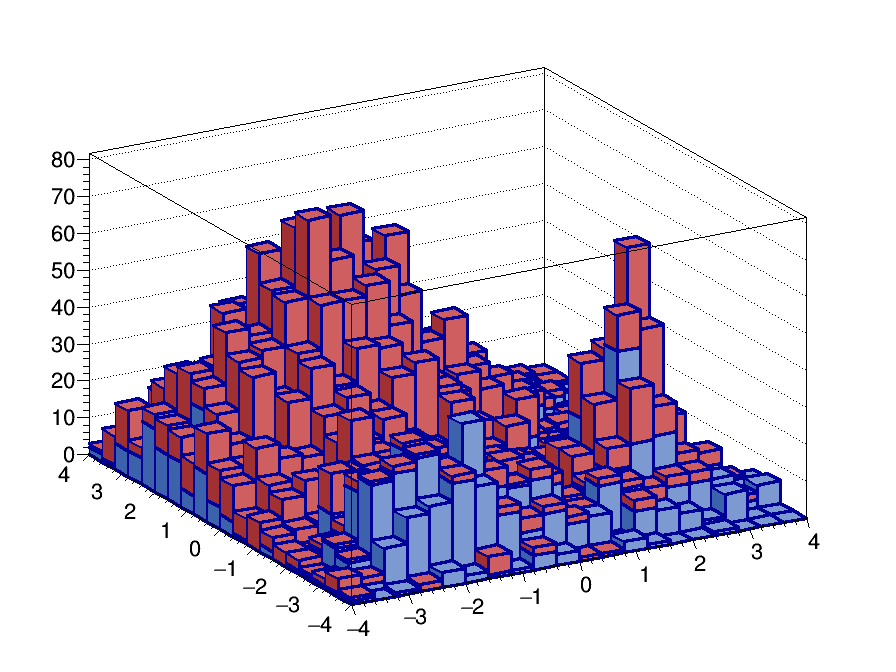

In [22]:
stHistogram_5_4->DrawClone();
canvas_5_4->Draw();